<a href="https://colab.research.google.com/github/hr9919/Computer-Vision/blob/main/hw2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Digital Image Processing

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import measure, segmentation
from google.colab.patches import cv2_imshow

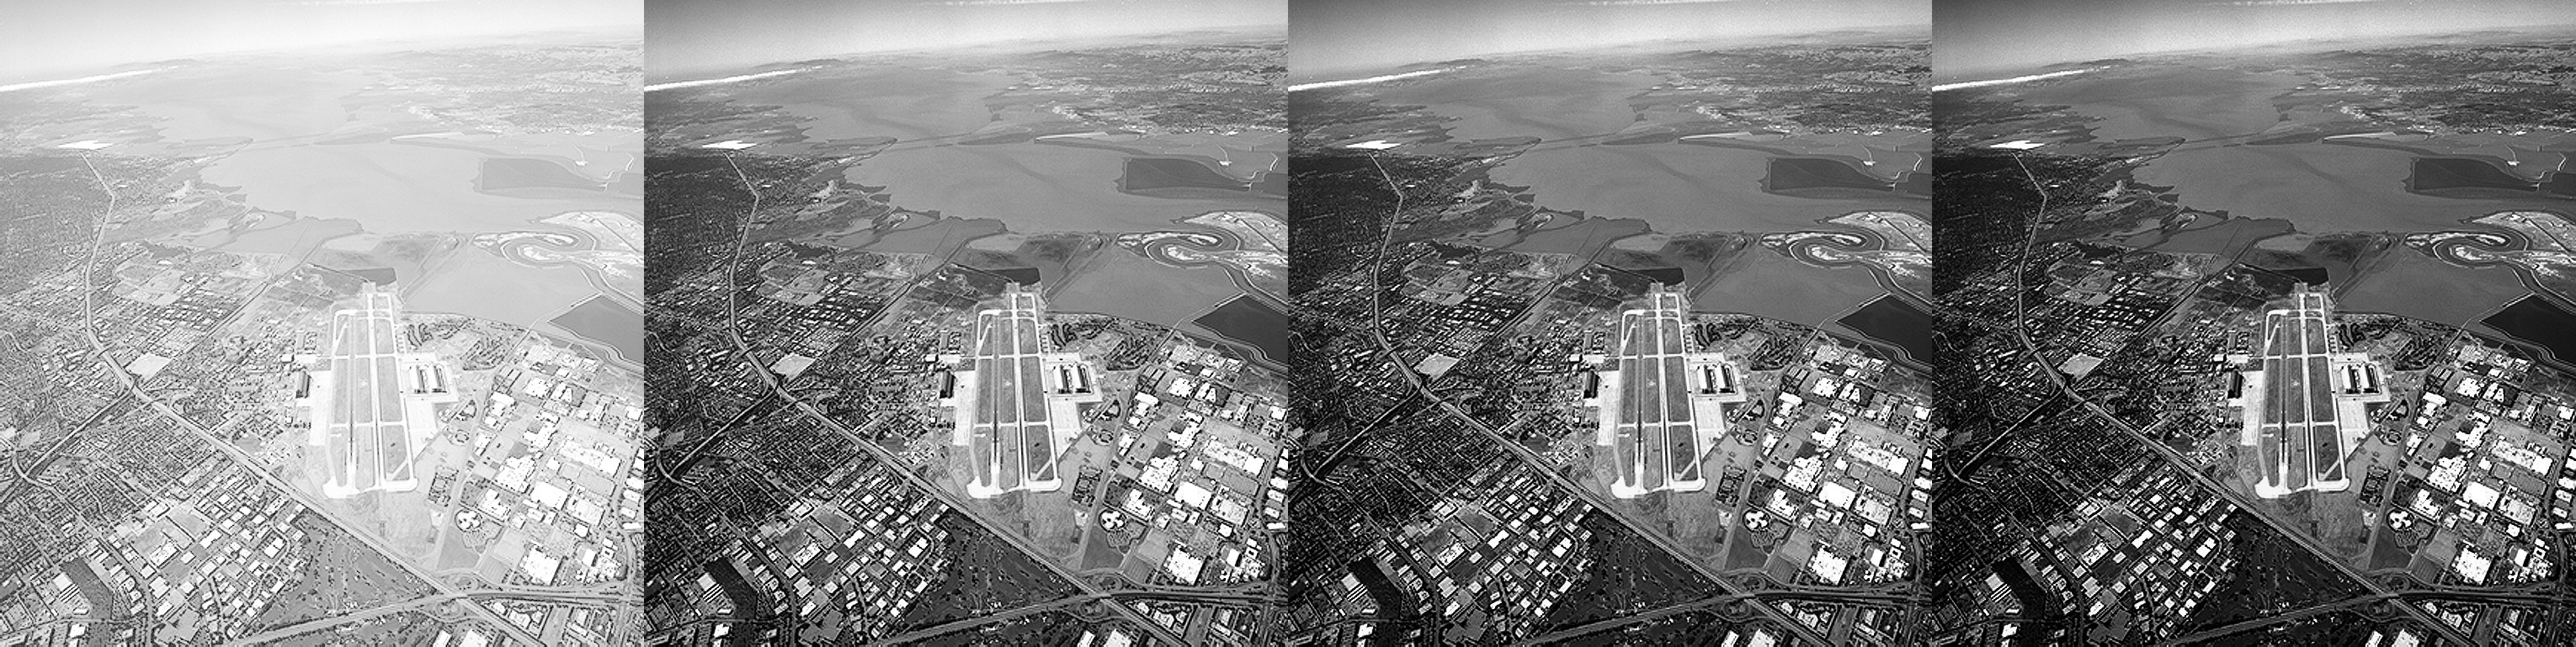

In [43]:
# HW 2-1
img1 = cv2.imread("/content/Fig0309(a)(washed_out_aerial_image).tif")
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 감마 보정
def gamma(img, g=1.0):
    f1 = img / 255.0  # 0~1로 정규화
    return np.uint8(255 * (f1 ** g))  # 감마 보정 후 다시 0~255로 변환

gc = np.hstack((
    gamma(gray1, 1.0),  # 감마 1.0 적용 (원본)
    gamma(gray1, 3.0),  # 감마 3.0 적용
    gamma(gray1, 4.0),  # 감마 4.0 적용
    gamma(gray1, 5.0)  # 감마 5.0 적용
))
cv2_imshow(gc)

# 결과 분석: 감마 값을 올릴수록 이미지가 어두워지고, 명암이 뚜렷해진다.

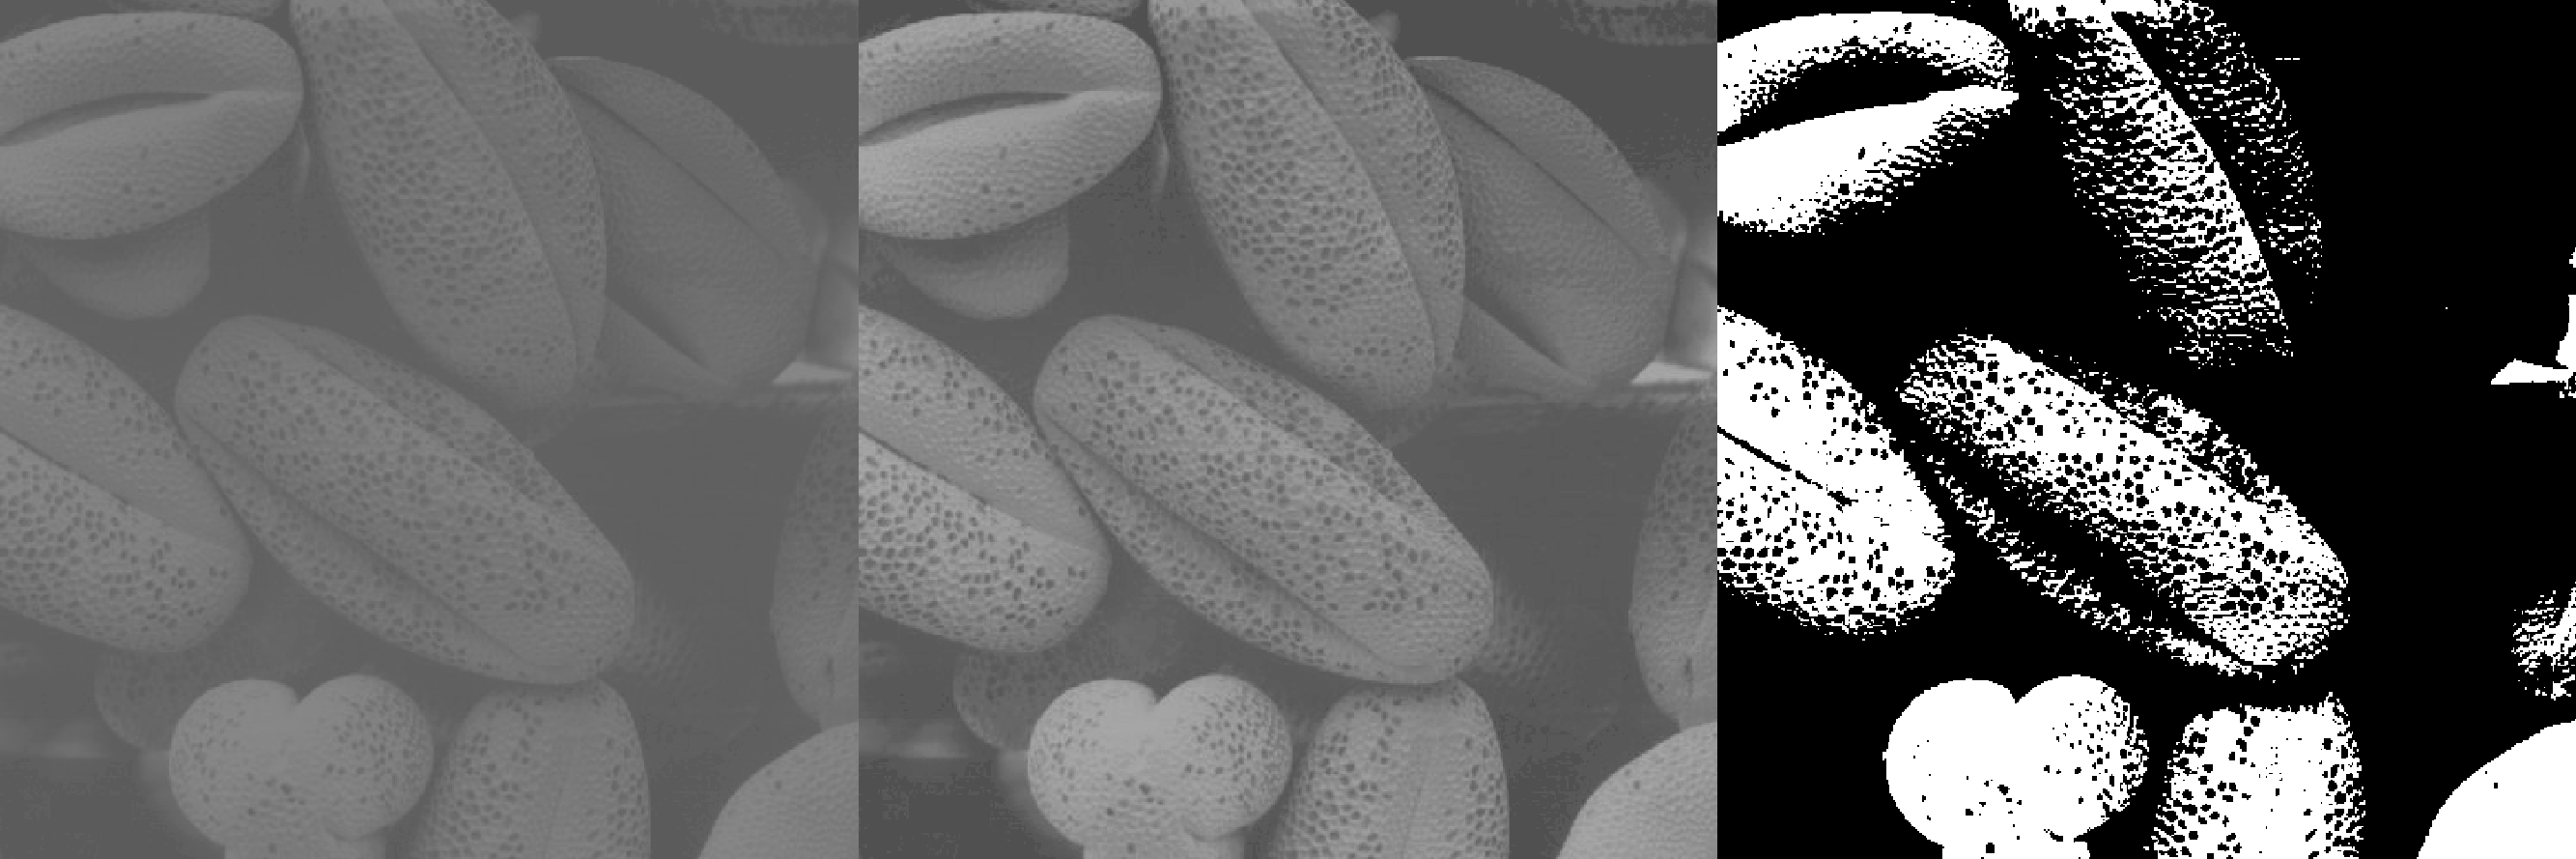

In [39]:
# HW 2-2
img2 = cv2.imread("/content/Fig0310(b)(washed_out_pollen_image).tif")
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

def contrast_stretching(img, r1, s1, r2, s2):
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i, j]
            if r < r1:
                output[i, j] = (s1 / r1) * r
            elif r <= r2:
                output[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                output[i, j] = ((255 - s2) / (255 - r2)) * (r - r2) + s2
    return np.uint8(output)

# Piecewise-Linear Transformation
piecewise = contrast_stretching(gray2, 50, 0, 180, 255)

# Thresholding
_, binary = cv2.threshold(piecewise, 128, 255, cv2.THRESH_BINARY)

result = np.hstack((gray2, piecewise, binary))
cv2_imshow(result)

# 결과 분석: Piecewise-Linear Transformation은 구조가 더 또렷하게 나타나고, Thresholding은 흑백이 선명하게 나뉘어 표현된다.

In [66]:
# HW 2-3
img3 = cv2.imread("/content/Fig0504(i)(salt-pepper-noise).tif")
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# 1번
mask1 = np.ones((3, 3)) / 9

# 2번
mask2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

# 3번
mask3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

# 4번
mask4 = np.array([[0, -1, -1], [1, 8, -1], [1, -1, 0]])

# 5번
mask5 = np.array([[-1, 0, 0], [0, 0, 1], [0, 1, 1]])

# 6번
mask6 = np.array([[0, 0, -1], [0, 0, 0], [1, 1, 0]])

# 컨볼루션
result1 = convolve2d(gray3, mask1, mode='same', boundary='symm')
result2 = convolve2d(gray3, mask2, mode='same', boundary='symm')
result3 = np.clip(result3, 0, 255)
result4 = convolve2d(gray3, mask4, mode='same', boundary='symm')  # 엣지/텍스처 강조 but 노이즈 민감
result5 = convolve2d(gray3, mask5, mode='same', boundary='symm')  # 수평 엣지 강조
result6 = convolve2d(gray3, mask6, mode='same', boundary='symm')  # 수직 엣지 강조

plt.figure(figsize=(20, 4))

titles = ['Original', '1', '2', '3', '4', '5', '6']
images = [gray3, result1, result2, result3, result4, result5, result6]

for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 결과 분석
# 1번: 노이즈가 감소되지만, 선명도가 떨어졌다.
# 2번: 1번에 비해 노이즈 감소가 적고 부드럽다.
# 3번: 경계선과 노이즈가 강조된다.
# 4번: 노이즈가 강조되었다.
# 5번: 수평 엣지가 강조되었다.
# 6번: 수직 엣지가 강조되었다.

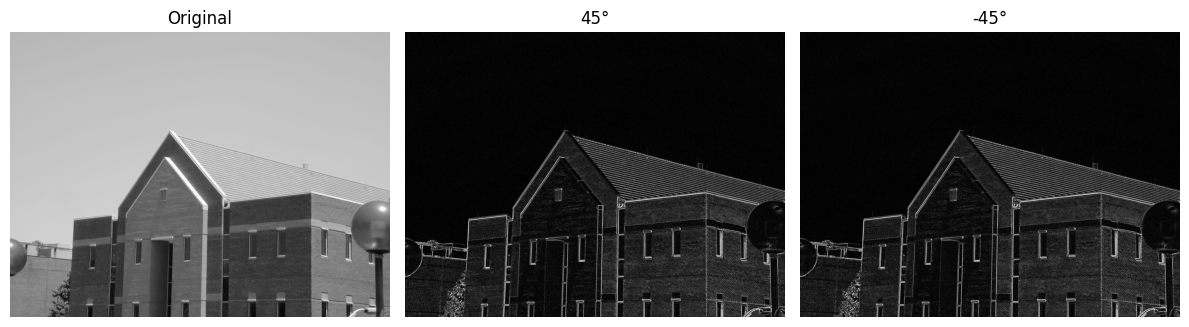

In [45]:
# HW 2-4
img4 = cv2.imread("/content/school.jpg")
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# 45° 방향 Sobel 변형 마스크
sobel_1 = np.array([[0, 1, 2],
                     [-1, 0, 1],
                     [-2, -1, 0]], dtype=np.float32)

# -45° 방향 Sobel 변형 마스크
sobel_2 = np.array([[2, 1, 0],
                      [1, 0, -1],
                      [0, -1, -2]], dtype=np.float32)

# 마스크 적용
edge_1 = cv2.filter2D(gray4, cv2.CV_16S, sobel_1)
edge_2 = cv2.filter2D(gray4, cv2.CV_16S, sobel_2)

edge_1_abs = cv2.convertScaleAbs(edge_2)
edge_2_abs = cv2.convertScaleAbs(edge_2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray4, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("45\u00b0")
plt.imshow(edge_1_abs, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("-45\u00b0")
plt.imshow(edge_2_abs, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

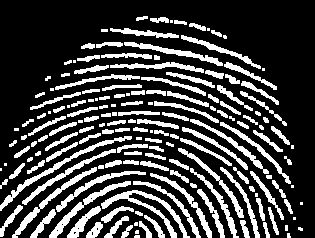

In [56]:
# HW 2-5
img5 = cv2.imread("/content/finger.jpg")
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

# Otsu
_, binary = cv2.threshold(gray5, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphology Open 연산
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

cv2_imshow(morph)

# 결과 분석: 지문 주변 노이즈가 깔끔하게 제거되었다.

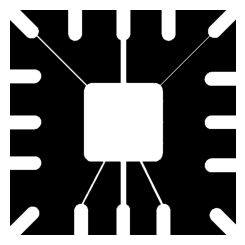

In [58]:
# HW 2-6
img6 = cv2.imread("/content/Fig0905(a)(wirebond-mask).tif", cv2.IMREAD_GRAYSCALE)
_, bin_img = cv2.threshold(img6, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 구조 요소
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# open 연산
opened = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)

# 얇은 선 추출
lines_removed = cv2.subtract(bin_img, opened)

# 얇은 선 제거
cleaned = cv2.subtract(bin_img, lines_removed)

plt.subplot(1, 2, 2)
plt.imshow(cleaned, cmap='gray')
plt.axis('off')
plt.show()

# 결과 분석: 2x2 구조 요소보다 작은 선분들이 제거되었다.

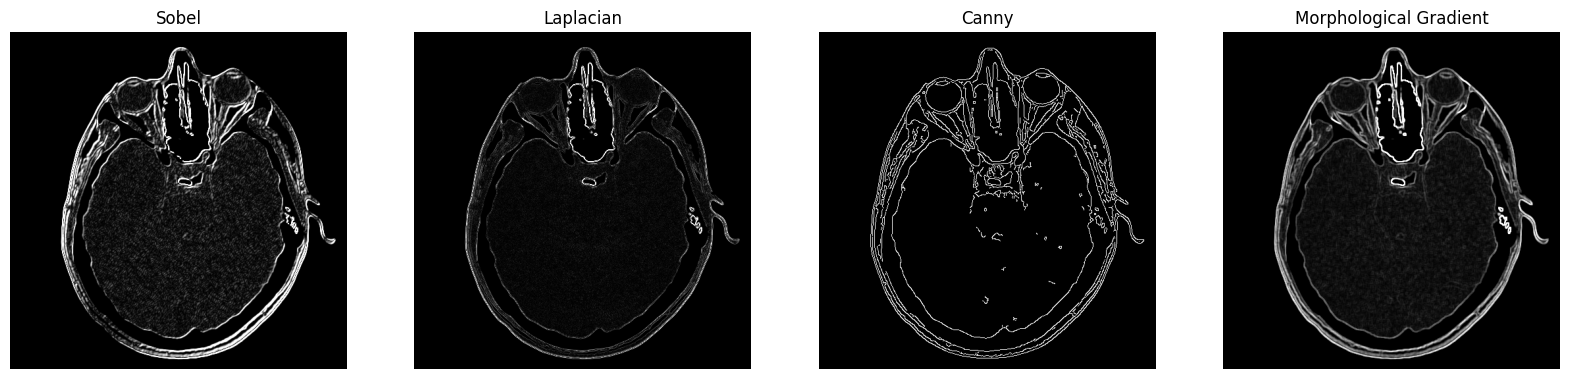

In [67]:
# HW 2-7
img7 = cv2.imread("/content/Fig0939(a)(headCT-Vandy).tif")
gray7 = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray7, cv2.CV_64F, 1, 0, ksize=3)  # x 방향 Sobel
sobely = cv2.Sobel(gray7, cv2.CV_64F, 0, 1, ksize=3)  # y 방향 Sobel
sobel = cv2.convertScaleAbs(0.5*sobelx + 0.5*sobely)  # 방향 통합
laplacian = cv2.Laplacian(gray7, cv2.CV_64F)  # Laplacian
laplacian = cv2.convertScaleAbs(laplacian)  # 0~255 범위로 클리핑 처리
canny = cv2.Canny(gray7, 100, 200)  # Canny
morph = cv2.dilate(gray7, None) - cv2.erode(gray7, None)  # Morphological Gradient

images = [sobel, laplacian, canny, morph]
titles = ['Sobel', 'Laplacian', 'Canny', 'Morphological Gradient']

plt.figure(figsize=(20, 5))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()

# 결과 비교
# Sobel: 경계가 강한 부분이 강조되지만 부드럽게 보인다.
# Laplacian: 경계가 급격히 변하는 부분을 강조하지만, 날카롭게 보인다.
# Canny: 경계가 아주 선명하고, 정확하게 보인다.
# Morphological Gradient: 경계가 굵고 뭉뚝하며, 다른 방법에 비해 분명하지 않다.

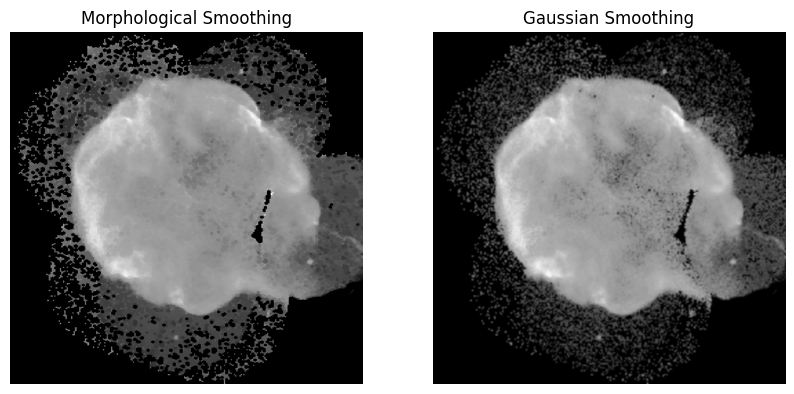

In [65]:
# HW 2-8
img8 = cv2.imread("/content/Fig0938(a)(cygnusloop_Xray_original).tif")
gray8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morph = cv2.morphologyEx(gray8, cv2.MORPH_CLOSE, kernel)  # Morphological Smoothing
gaussian = cv2.GaussianBlur(gray8, (5,5), 0)  # Smoothing Filter

images = [morph, gaussian]
titles = ['Morphological Smoothing', 'Gaussian Smoothing']

plt.figure(figsize=(10, 5))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()

# 결과 비교: Morphological Smoothing은 경계가 부드러워지면서 이미지의 디테일이 보존되지만, Smoothing Filter는 디테일이 흐려지면서 부드러워졌다.

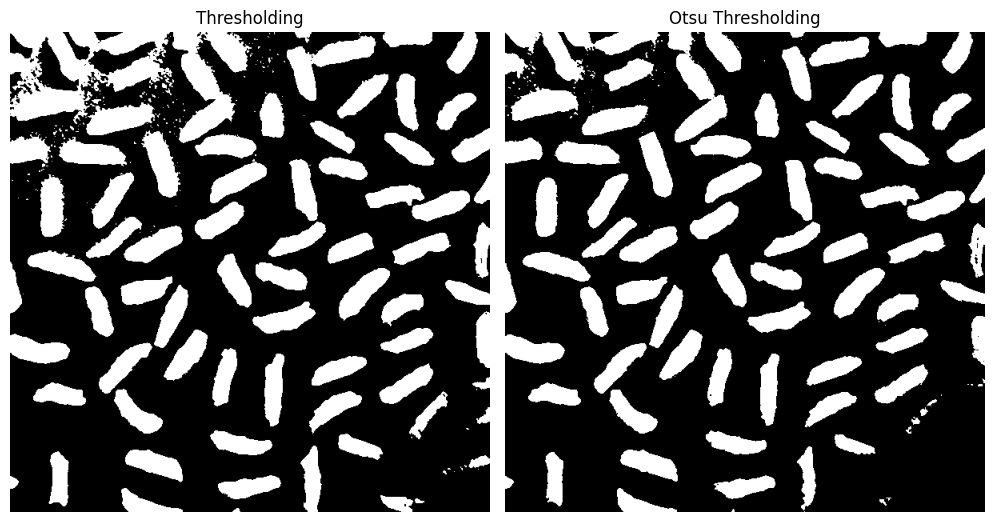

In [74]:
# HW 2-9
img9 = cv2.imread("/content/Fig0940(a)(rice_image_with_intensity_gradient).tif")
gray9 = cv2.cvtColor(img9, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, th1 = cv2.threshold(gray9, 127, 255, cv2.THRESH_BINARY)  # 임계값 127

# Otsu Algorithm
ret2, th2 = cv2.threshold(gray9, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(15, 6))

# Thresholding 결과
plt.subplot(1, 3, 1)
plt.imshow(th1, cmap='gray')
plt.title("Thresholding")
plt.axis('off')

# Otsu 결과
plt.subplot(1, 3, 2)
plt.imshow(th2, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()

# 결과 비교: Otsu가 더 깨끗하게 객체를 이진화하지만. 배경과 객체가 구별이 잘 안되는 부분은 손실이 있다.
